<div style="background-color: lightblue; color: black; padding: 20px; font-weight: bold; font-size: 15px;">Extra Trees</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error

RSEED=42

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Read data - Here: Data with 3x rolling shifted average & without store & department dummies</div>

In [2]:
df = pd.read_pickle('../data/data_combined_clean_features_11.pkl')

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Train test split</div>

In [3]:
#define train, validation and test dataset
train = df[df['Date'] < "2012-01-06"].reset_index(drop=True)
validation = df[(df['Date'] >= "2012-01-06") & (df['Date'] <= "2012-06-08")].reset_index(drop=True)
test = df[df['Date'] > "2012-06-08"].reset_index(drop=True)
 

#define features and target
X_train = train.drop(columns=['Weekly_Sales', 'Date'])
y_train = train['Weekly_Sales']

X_validation = validation.drop(columns=['Weekly_Sales', 'Date'])
y_validation = validation['Weekly_Sales']

X_test = test.drop(columns=['Weekly_Sales', 'Date'])
y_test = test['Weekly_Sales']  

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Extra Trees</div>

In [5]:
# writing a function to get evaluation metrics for all data sets
def get_metrics(y, y_hat, data_kind):
    '''insert target, predicted target 
    and which kind of dataset as a string'''
    
    mean = y.mean()
    std = y.std()
    mse = mean_squared_error(y, y_hat)
    rmse = np.sqrt(mse)

    print(5*'- - ')
    print(f'Metrics for {data_kind}')
    print('Mean weekly sales:', mean.round(3))
    print('Standard deviation weekly sales:', std.round(3))
    print('MSE:', mse.round(3))
    print('RMSE:', rmse.round(3))
    print(5*'- - ')


<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Best model</div>

In [6]:
# instantiate model
model = ExtraTreesRegressor(
    max_depth=25, 
    max_features=0.5, 
    min_samples_leaf=1, 
    n_estimators= 100,
    random_state=42)

# fit the model with train data 
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_validation = model.predict(X_validation)
y_pred_test = model.predict(X_test)

In [7]:
get_metrics(y_train, y_pred_train, 'Train')
get_metrics(y_validation, y_pred_validation, 'Validation')
get_metrics(y_test, y_pred_test, 'Test')

- - - - - - - - - - 
Metrics for Train
Mean weekly sales: 17639.364
Standard deviation weekly sales: 23534.607
MSE: 1190150.665
RMSE: 1090.94
- - - - - - - - - - 
- - - - - - - - - - 
Metrics for Validation
Mean weekly sales: 17342.499
Standard deviation weekly sales: 22893.483
MSE: 11017994.196
RMSE: 3319.336
- - - - - - - - - - 
- - - - - - - - - - 
Metrics for Test
Mean weekly sales: 17402.01
Standard deviation weekly sales: 22530.901
MSE: 7087163.445
RMSE: 2662.173
- - - - - - - - - - 


<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Adding predicted values to train, validation and test dataframe</div>

In [8]:
train['Predicted_Sales'] = y_pred_train
validation['Predicted_Sales'] = y_pred_validation
test['Predicted_Sales'] = y_pred_test

In [12]:
# concat dataframes
validation_and_test = pd.concat([validation, test], axis=0)

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Getting numbers for prediction period </div>

In [17]:
print ('Weeks of prediction period:', validation_and_test.Date.nunique())

Weeks of prediction period: 43


In [14]:
get_metrics(validation_and_test.Weekly_Sales, 
            validation_and_test.Predicted_Sales, 'Validation and Test')



- - - - - - - - - - 
Metrics for Validation and Test
Mean weekly sales: 17370.179
Standard deviation weekly sales: 22725.48
MSE: 9189700.823
RMSE: 3031.452
- - - - - - - - - - 


In [18]:
print('Total Sales during prediction period:', validation_and_test.Weekly_Sales.sum())

Total Sales during prediction period: 1986801036.38


In [25]:
print('Standard deviation prediction period:', validation_and_test.Weekly_Sales.std().round(2))

Standard deviation prediction period: 22725.48


<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Metrics for each store during prediction period </div>

In [19]:
for store in validation_and_test.Store.unique():
    print(f'Values for store {store}')
    store_data = validation_and_test[validation_and_test['Store'] == store]
    
    get_metrics(store_data['Weekly_Sales'], store_data['Predicted_Sales'], 'Validation and Test')


Values for store 1
- - - - - - - - - - 
Metrics for Validation and Test
Mean weekly sales: 23061.685
Standard deviation weekly sales: 29081.053
MSE: 11013514.618
RMSE: 3318.662
- - - - - - - - - - 
Values for store 2
- - - - - - - - - - 
Metrics for Validation and Test
Mean weekly sales: 28182.308
Standard deviation weekly sales: 33366.509
MSE: 12824382.595
RMSE: 3581.115
- - - - - - - - - - 
Values for store 3
- - - - - - - - - - 
Metrics for Validation and Test
Mean weekly sales: 7192.85
Standard deviation weekly sales: 12701.431
MSE: 3174108.837
RMSE: 1781.603
- - - - - - - - - - 
Values for store 4
- - - - - - - - - - 
Metrics for Validation and Test
Mean weekly sales: 31573.604
Standard deviation weekly sales: 35710.966
MSE: 14058202.758
RMSE: 3749.427
- - - - - - - - - - 
Values for store 5
- - - - - - - - - - 
Metrics for Validation and Test
Mean weekly sales: 5737.742
Standard deviation weekly sales: 8820.653
MSE: 2047795.654
RMSE: 1431.012
- - - - - - - - - - 
Values for store

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Plotting actual target versus predicted target - Prediction period </div>

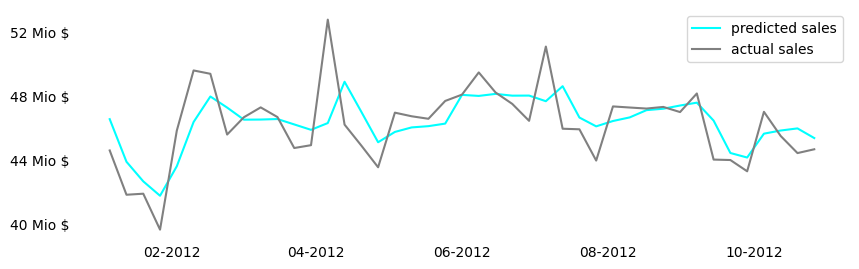

In [21]:
plt.figure(figsize=(10, 3))

#plotting lines for predicted and actual sales
sns.lineplot(data=validation_and_test, x='Date', 
             y=validation_and_test.groupby(['Date'])['Predicted_Sales'].transform('sum'), 
             label='predicted sales', errorbar=None,
             color='cyan')
sns.lineplot(data=validation_and_test, x='Date', 
             y=validation_and_test.groupby(['Date'])['Weekly_Sales'].transform('sum'), 
             label ='actual sales', color='grey', 
             errorbar=None) #linestyle='--', 

# y ticks formatting
plt.gca().yaxis.set_major_formatter(lambda x, _: f'{x / 1e6:.0f} Mio $')
ytick_positions = [plt.gca().get_yticks()[1], plt.gca().get_yticks()[3], 
                   plt.gca().get_yticks()[5], plt.gca().get_yticks()[7]]

plt.gca().set_yticks(ytick_positions)
plt.gca().tick_params(axis='y', which='both', length=0)

# x ticks formatting
from matplotlib.dates import DateFormatter
date_format = DateFormatter("%m-%Y")
plt.gca().xaxis.set_major_formatter(date_format)

xtick_positions = [plt.gca().get_xticks()[1], plt.gca().get_xticks()[3], 
                   plt.gca().get_xticks()[5], plt.gca().get_xticks()[7],
                   plt.gca().get_xticks()[9]]

plt.gca().set_xticks(xtick_positions)
plt.gca().tick_params(axis='x', which='both', length=0)

sns.despine(top=True, right=True, left=True, bottom=True)

plt.title('')#Prediction period - Weekly sales actual vs predicted 
plt.ylabel('')#weekly sales
plt.xlabel('')#Date
plt.legend();

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Printing different seasonality - stores with extreme patterns</div>

In [32]:
# seperate dataframe for total sale per week on storelevel
df_store_weekly_sales = df.groupby(['Store', 'Date'])['Weekly_Sales'].sum().reset_index()

# dataframes for plotting single store pattern
df_store_10 = df_store_weekly_sales.query('Store==10')
df_store_33 = df_store_weekly_sales.query('Store==33')

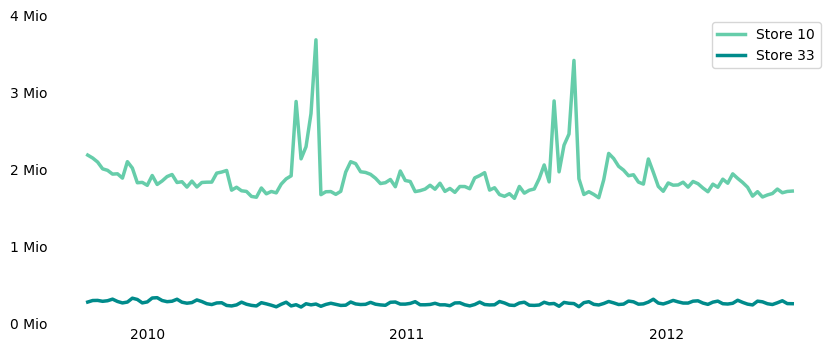

In [36]:
# plot extreme seasonal patterns
plt.figure(figsize=(10, 4))

sns.lineplot(x = df_store_10['Date'], y = df_store_10['Weekly_Sales'], 
              linewidth=2.5, color='mediumaquamarine', label='Store 10')

sns.lineplot(x = df_store_33['Date'], y = df_store_33['Weekly_Sales'], 
              linewidth=2.5, color='darkcyan', label='Store 33')

sns.despine(top=True, right=True, left=True, bottom=True)

# y ticks as Mio and not all of them
plt.gca().yaxis.set_major_formatter(lambda x, _: f'{x / 1e6:.0f} Mio')

# Festlegen der y-Achsenticks
ytick_positions = [0, 1e6, 2e6, 3e6, 4e6]
plt.yticks(ytick_positions)

plt.gca().tick_params(axis='y', which='both', length=0)

# x ticks as Year and only 1st per year
from matplotlib.dates import DateFormatter
date_format = DateFormatter("%Y")
plt.gca().xaxis.set_major_formatter(date_format)

xtick_positions = [plt.gca().get_xticks()[1], plt.gca().get_xticks()[4], plt.gca().get_xticks()[7]]
plt.gca().set_xticks(xtick_positions)
plt.gca().tick_params(axis='x', which='both', length=0)

plt.ylabel('')
plt.xlabel('')
plt.title('', pad=30); #'Store 10 an 33 weekly sales on store level'


In [37]:
validation_and_test_one_store_one_dept = validation_and_test.query('Store==8 and Dept==10')

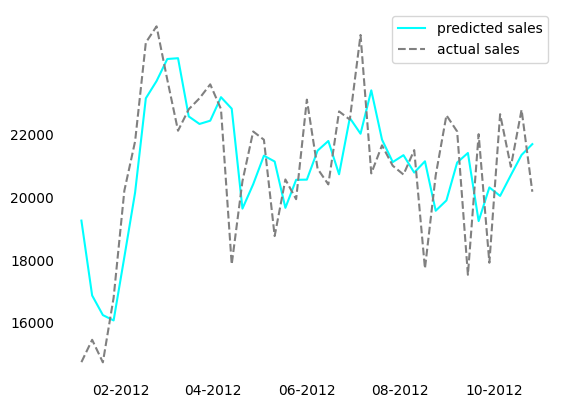

In [40]:
sns.lineplot(data=validation_and_test_one_store_one_dept, 
             x='Date', y=validation_and_test_one_store_one_dept.groupby(['Date'])['Predicted_Sales'].transform('sum'), 
             label='predicted sales', errorbar=None,
             color='cyan')
sns.lineplot(data=validation_and_test_one_store_one_dept, 
             x='Date', y=validation_and_test_one_store_one_dept.groupby(['Date'])['Weekly_Sales'].transform('sum'), 
             label ='actual sales', errorbar=None, 
             color='grey', linestyle='--')

sns.despine(top=True, right=True, left=True, bottom=True)

# y ticks formatting
#plt.gca().yaxis.set_major_formatter(lambda x, _: f'{x / 1e6:.0f} Mio $')
ytick_positions = [plt.gca().get_yticks()[1], plt.gca().get_yticks()[2], 
                   plt.gca().get_yticks()[3], plt.gca().get_yticks()[4]]

plt.gca().set_yticks(ytick_positions)
plt.gca().tick_params(axis='y', which='both', length=0)

# x ticks formatting
from matplotlib.dates import DateFormatter
date_format = DateFormatter("%m-%Y")
plt.gca().xaxis.set_major_formatter(date_format)

xtick_positions = [plt.gca().get_xticks()[1], plt.gca().get_xticks()[3], 
                   plt.gca().get_xticks()[5], plt.gca().get_xticks()[7],
                   plt.gca().get_xticks()[9]]

plt.gca().set_xticks(xtick_positions)
plt.gca().tick_params(axis='x', which='both', length=0)

plt.title('')#Validation data - Weekly sales actual vs predicted - Store X Department X'
plt.ylabel('')#weekly sales
plt.xlabel('')#date
#plt.xticks(rotation=45)
plt.legend();
#plt.ticklabel_format(style='plain', axis='y');

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Adding prediction of baseline model</div>

In [41]:
# Loading baseline prediction
df_baseline = pd.read_pickle('../data/dataset_prediction_baseline.pkl')

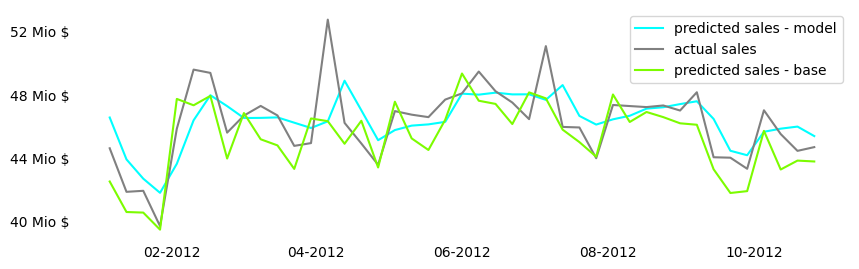

In [43]:
plt.figure(figsize=(10, 3))

#plotting lines for predicted and actual sales
sns.lineplot(data=validation_and_test, x='Date', 
             y=validation_and_test.groupby(['Date'])['Predicted_Sales'].transform('sum'), 
             label='predicted sales - model', errorbar=None,
             color='cyan')
sns.lineplot(data=validation_and_test, x='Date', 
             y=validation_and_test.groupby(['Date'])['Weekly_Sales'].transform('sum'), 
             label ='actual sales', color='grey', 
             errorbar=None) #linestyle='--', 
sns.lineplot(data=df_baseline, x='Date', 
             y=df_baseline.groupby(['Date'])['Weekly_Sales_train_data_mean'].transform('sum'), 
             label = 'predicted sales - base', color='lawngreen',
             errorbar=None)

# y ticks formatting
plt.gca().yaxis.set_major_formatter(lambda x, _: f'{x / 1e6:.0f} Mio $')
ytick_positions = [plt.gca().get_yticks()[1], plt.gca().get_yticks()[3], 
                   plt.gca().get_yticks()[5], plt.gca().get_yticks()[7]]

plt.gca().set_yticks(ytick_positions)
plt.gca().tick_params(axis='y', which='both', length=0)

# x ticks formatting
from matplotlib.dates import DateFormatter
date_format = DateFormatter("%m-%Y")
plt.gca().xaxis.set_major_formatter(date_format)

xtick_positions = [plt.gca().get_xticks()[1], plt.gca().get_xticks()[3], 
                   plt.gca().get_xticks()[5], plt.gca().get_xticks()[7],
                   plt.gca().get_xticks()[9]]

plt.gca().set_xticks(xtick_positions)
plt.gca().tick_params(axis='x', which='both', length=0)

sns.despine(top=True, right=True, left=True, bottom=True)
#plt.title('Validation and test data - Weekly sales actual vs predicted')
plt.ylabel('')#weekly sales
plt.xlabel('')#Date
#plt.xticks(rotation=45)
plt.legend();
#plt.ticklabel_format(style='plain', axis='y')

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Getting numbers for prediction period - Store 4 </div>

In [45]:
baseline_store_4 = df_baseline.query('Store==4')

In [47]:
get_metrics(baseline_store_4['Weekly_Sales_train_data_mean'], baseline_store_4['Weekly_Sales_test_data'], 'Prediction period - Baseline model - Store 4')

- - - - - - - - - - 
Metrics for Prediction period - Baseline model - Store 4
Mean weekly sales: 28936.788
Standard deviation weekly sales: 32214.162
MSE: 36225191.844
RMSE: 6018.737
- - - - - - - - - - 


In [48]:
validation_and_test_store_4 = validation_and_test.query('Store == 4')

In [51]:
print('Sales store 4 in total for prediction period:', 
      validation_and_test_store_4.Weekly_Sales.sum())

Sales store 4 in total for prediction period: 92321217.24


In [53]:
print('Number of observations for prediction period store 4:', 
      validation_and_test_store_4.shape[0])

Number of observations for prediction period store 4: 2924
